# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

Following the initial publication of the book in 2011, Erica Chenoweth continued her research on the topic and published a follow-up ten years later, [Civil Resistance: What Everyone Needs to Know](https://www.ericachenoweth.com/research/civil-resistance-what-everyone-needs-to-know). She has also continued to update the data used for her research.

The research became famous for propising the 3.5% rule: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event"; you can find a nice overview at [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). Among other things, you will investigate that rule.

To answer the questions, you will use that data, the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). You will also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), in particular the Polity5 version, available from [Integrated Network for Societal Conflict Research (INSCR) ](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Read in the data
p5_df = pd.read_excel('p5v2018.xls')
df_navco = pd.read_csv('NAVCO 1.2 Updated.tab', sep='\t')
df_navco


,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the documentation found [here](https://navcomap.wcfia.harvard.edu/variable-descriptions), all the columns and their descriptions are as follows:

| Variable Name          | Source                                                                | Variable Description                                                                                                                                                                                                                                                                                                                                         |
|------------------------|-----------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| NAVCO ID               | NAVCO 2.1 ID assigned to campaign.                                    | -                                                                                                                                                                                                                                                                                                                                                            |
| CAMPAIGN               | Various encyclopedic entries; scholarly works; subject and area experts | Name of campaign.                                                                                                                                                                                                                                                                                                                                            |
| LOCATION               | Various encyclopedic entries; scholarly works; subject and area experts | Geographic base of campaign (sovereign country).                                                                                                                                                                                                                                                                                                              |
| BYEAR                  | Various encyclopedic entries; scholarly works; subject and area experts | Year in which the campaign begins.                                                                                                                                                                                                                                                                                                                           |
| EYEAR                  | Various encyclopedic entries; scholarly works; subject and area experts | Year at which the campaign reaches its peak; i.e. the most members or watershed events. If data is unavailable for membership or events, this peak is considered to be the year in which the campaign ended (i.e. if the regime changed in 2002, the peak is 2002).                                                                                         |
| TARGET                 | Various encyclopedic entries; scholarly works; subject and area experts | Target of the campaign.                                                                                                                                                                                                                                                                                                                                      |
| SUCCESS                | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying whether the campaign achieved 100% of its stated goals within a year of the peak of activities. In most cases, the outcome was achieved within a year of the campaign’s peak. Some campaigns’ goals were achieved years after the “peak” of the struggle in terms of membership, but the success was a direct result of campaign activities. When such a direct link can be demonstrated, these campaigns are coded as successful. Note that where information was available regarding the campaign’s outcome in 2014, the most current information was used.          |
| LIMITED                | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying whether the campaign achieved some of its stated goals within a year of the peak of activities. When a regime makes concessions to the campaign or reforms short of complete campaign success, such reforms are counted as limited success.                                                                                                                                               |
| FAILURE                | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying whether the campaign achieved none of its stated goals; includes campaigns that have been suppressed. Campaigns are coded as failures when they are ongoing as of the end of 2014 and are classified as “ongoing.”                                                                                                              |
| ONGOING                | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying whether the campaign is ongoing and has not yet achieved its goals. Only when campaigns are ongoing and have achieved no stated objectives/outcomes by the end of 2014.                                                                                                                                                            |
| NONVIOL                | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying that a campaign was primarily nonviolent during the observation.                                                                                                                                                                                                                                                                |
| VIOL                   | UCDP Armed Conflict Dataset; Gleditsch 2004; Lyall and Wilson 2009; Sepp 2005 | Binary variable identifying that a campaign was primarily violent during the observation.                                                                                                                                                                                                                                                                    |
| REGCHANGE              | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying the purpose of the campaign as removing the incumbent national leader, excluding the expulsion of foreign occupiers.                                                                                                                                                                                                              |
| FSELFDET               | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying the purpose of the campaign as self-determination or independence from a foreign occupier or colonial power.                                                                                                                                                                                                                      |
| SECESSION              | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying the purpose of the campaign as self-determination or territorial secession/separatism from an existing state in a territory internationally recognized as part of the target state. Sometimes these campaigns claim objectives of expelling foreign occupations. This campaign type is distinct from anti-occupation campaigns, however, because the contested territory is internationally recognized as sovereign to the target state.           |
| OTHER                  | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying the purpose of the campaign as distinct from the previous three objectives (i.e. purpose is NOT to expel a foreign occupation, change a domestic regime, or territorial separation). However, these are major campaigns with “difficult” goals, which exclude labor rights, civil rights, and other types of campaigns.                                                                    |
| DURATION               | Author’s calculation                                                   | Length of the campaign in days.                                                                                                                                                                                                                                                                                                                              |
| PARTICIPATION          | Various eyewitness news reports; encyclopedic entries; scholarly works; subject and area experts | Number of participants observed actively confronting opponents at the highest point (peak event). This reports the largest participation reported at a watershed event. It does not estimate the cumulative number of participants.                                                                                                                                                                            |
| PERCENTAGE POPULAR PARTICIPATION | Author’s calculation; Penn World Tables 6.2; World Bank Data; Popstat website | Percent of the target’s national population involved in the peak event (participation / population).                                                                                                                                                                                                                                                       |
| REGVIOL                | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying whether the regime used violence to crack down on the campaign.                                                                                                                                                                                                                                                                    |
| DEFECT                 | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying whether the target’s security forces defected or engaged in noncooperation during the conflict. Does not include routine individual mutinies or desertions but rather large-scale, systematic breakdowns of the execution of orders from the target regime.                                                                                                                         |
| VIOLENT FLANK         | Various encyclopedic entries; scholarly works; subject and area experts | Coded for nonviolent campaigns only. Binary variable identifying whether some dissidents within a nonviolent campaign have begun to use violence, even though the larger campaign remains primarily nonviolent, at any point during the course of the campaign.                                                                                                                                                      |
| VIOLSIM                | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable identifying whether a different violent campaign was active simultaneously to the major campaign. Can include an independent terrorist group, violent insurrection, or other violent “spoiler” at any point during the course of the campaign.                                                                                                                                                            |
| REGAID                 | Various encyclopedic entries; scholarly works; subject and area experts | Binary variable indicating whether the target received overt military aid from another state to fight the campaign.                                                                                                                                                                                                                                         |
| STATESUP               | Record 2006; various encyclopedic entries; scholarly works; subject and area experts | Binary variable indicating whether the campaign received overt military or economic aid from another state to fight against the target.                                                                                                                                                                                                                        |

Note: Missing variables are simply left blank in the database, except as otherwise noted.


## 1. Exploration of Historical Trends

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

Your plot should look like the following:

<img src="fig_1.svg"/>

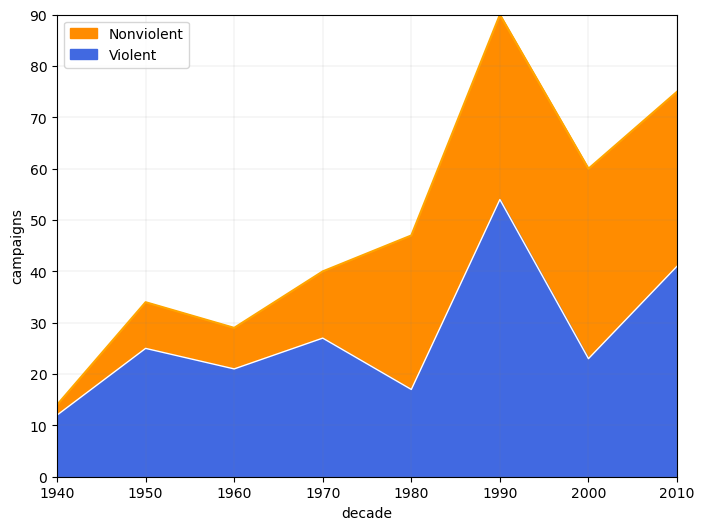

In [6]:
# Drop NaN values in the 'EYEAR' column
df_navco.dropna(subset=['EYEAR'], inplace=True)

# Extract the 'EYEAR' column and floor down to the nearest decade
df_navco['Decade'] = (np.floor(df_navco['EYEAR'] / 10) * 10).astype(int)

df_navco['Decade'].round().astype(int)

from matplotlib import patches
import matplotlib.pyplot as plt

# Create a line plot connecting the different points
plt.figure(figsize=(8,6), dpi=100)

# Split the data into two groups based on the 'VIOL' column
viol_counts = df_navco[df_navco['VIOL'] == 1]['Decade'].value_counts().sort_index()
non_viol_counts = df_navco['Decade'].value_counts().sort_index()

plt.plot(non_viol_counts.index, non_viol_counts.values, linestyle='-', color='orange')
plt.plot(viol_counts.index, viol_counts.values, linestyle='-', linewidth =1, color = 'white')

plt.xlim(1940, 2010)
plt.ylim(0,90)

# Show grid with specific formatting
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.1, color='gray')

# Fill the area below the line
plt.fill_between(non_viol_counts.index, non_viol_counts.values, color='darkorange', alpha=1)
plt.fill_between(viol_counts.index, viol_counts.values, color='royalblue', alpha=1)

plt.xlabel('decade')
plt.ylabel('campaigns')

# Create a legend with colored rectangles
legend_rect1 = patches.Patch(color='darkorange', label='Nonviolent')
legend_rect2 = patches.Patch(color='royalblue', label='Violent')

plt.legend(handles=[legend_rect1, legend_rect2], loc='upper left')


plt.show()

The column `PRIMARY RESISTANCE TYPE` indicates whether a campaign was violent or not. In our dataset this the `VIOL` column based on the metadata of the dataset [here](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/0UZOTX/B4RH7S&version=2.0)

Regarding the decade based on their end years, at decades, based on the documentation, we can verify that the `EYEAR` is the year at which the campaign reached its peak and for the cases that the data is unavailable, the peak is considered to be the year in which the campaign ended (which also makes sense)

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics, and it should look like this:

<img src="fig_2.svg"/>


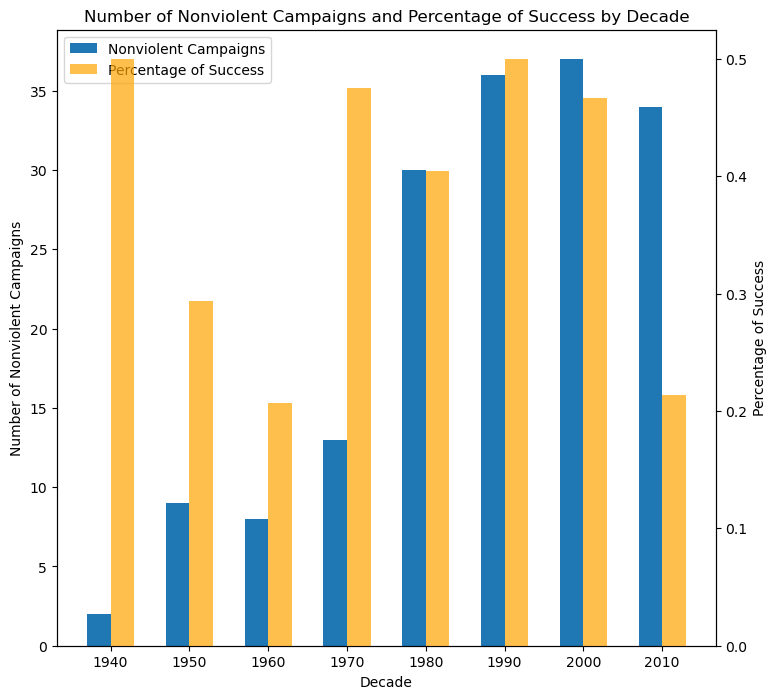

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_navco is your DataFrame

# Filter data for decades from 1940 onwards
df_filtered = df_navco[df_navco['Decade'] >= 1940]

# Group by 'Decade' and count nonviolent campaigns
nonviolent_counts = df_filtered[df_filtered['VIOL'] == 0].groupby('Decade').size()

# Group by 'Decade' and calculate the percentage of success
success_percentages = df_filtered.groupby('Decade')['SUCCESS'].mean()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8.5, 8))

# Bar width for side-by-side plots
bar_width = 0.3

# Position for each bar on the x-axis
bar_positions_counts = np.arange(len(nonviolent_counts))
bar_positions_percentages = bar_positions_counts + bar_width

# Bar plot for the number of nonviolent campaigns (in blue)
bars1 = ax.bar(bar_positions_counts, nonviolent_counts, color='tab:blue', width=bar_width, label='Nonviolent Campaigns')

# Set labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Nonviolent Campaigns')
ax.set_title('Number of Nonviolent Campaigns and Percentage of Success by Decade')
# Set ticks and labels for each bar
ax.set_xticks(bar_positions_counts + bar_width / 2)
ax.set_xticklabels(nonviolent_counts.index)

# Create a secondary y-axis for percentage of success on the right side
ax2 = ax.twinx()

# Bar plot for the percentage of success (in red)
bars2 = ax2.bar(bar_positions_percentages, success_percentages, color='orange', width=bar_width, alpha=0.7, label='Percentage of Success')

# Set labels for the secondary y-axis
ax2.set_ylabel('Percentage of Success')  # Set color for the secondary y-axis title

# Combine handles and labels from both bar plots for the legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

# Display the legend with handles and labels
ax.legend(handles, labels, loc='upper left')

# Show the plot
plt.show()

Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like the following, showing that nonviolent campaigns have higher success probabilities:

<img src="fig_3.svg" />

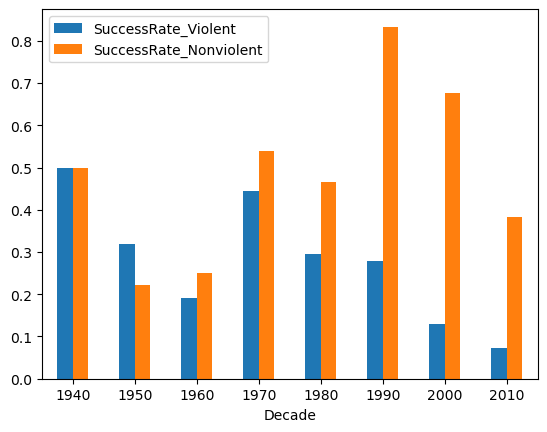

<Figure size 2300x600 with 0 Axes>

In [8]:
import pandas as pd

# Assuming df_navco is your DataFrame

# Separate records based on the 'VIOL' column
violent_campaigns = df_navco[df_navco['VIOL'] == 1]
nonviolent_campaigns = df_navco[df_navco['NONVIOL'] == 1]

# Calculate success rates for violent and nonviolent campaigns by decade
violent_success_rate_by_decade = violent_campaigns.groupby('Decade')['SUCCESS'].mean().reset_index(name='SuccessRate_Violent')
nonviolent_success_rate_by_decade = nonviolent_campaigns.groupby('Decade')['SUCCESS'].mean().reset_index(name='SuccessRate_Nonviolent')

# Merge the DataFrames on 'Decade'
merged_df = pd.merge(violent_success_rate_by_decade, nonviolent_success_rate_by_decade, on='Decade', how='outer')


# Set 'Decade' as the index
merged_df.set_index('Decade', inplace=True)

# Plott the results
ax = merged_df.plot.bar(rot=0)

# Plotting
plt.figure(figsize=(23, 6))

plt.show()


In [9]:
temp_namco = df_navco

dictionary_with_colors_statuses = {
    'SUCCESS': {'color': 'red', 'text': 'Campaign succeeded'},
    'LIMITED':  {'color': 'red', 'text': 'Campaign achieved major concessions short of full success'},
    'FAILURE':  {'color': 'red', 'text': 'Campaign failed'}
}

# Function to apply the multiple if statement
def get_status(row, dictionary_with_colors_statuses):
    if round(row['SUCCESS']) == 1: return dictionary_with_colors_statuses['SUCCESS']['text']
    if round(row['LIMITED']) == 1: return dictionary_with_colors_statuses['LIMITED']['text']
    if round(row['FAILURE']) == 1: return dictionary_with_colors_statuses['FAILURE']['text']

# Apply the function to create a new column
temp_namco['status'] = temp_namco.apply(get_status, args=(dictionary_with_colors_statuses,), axis=1)

temp_namco


,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,Decade,status
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0,1970,Campaign succeeded
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0,1980,Campaign succeeded
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0,1990,Campaign succeeded
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0,2010,Campaign failed
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0,1990,Campaign succeeded
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,249.0,Zambian independence movement,Zambia,1961.0,1963.0,British rule,1.0,0.0,0.0,0.0,...,1000000.0,0.285063,0.0,1.0,0.0,0.0,0.0,0.0,1960,Campaign succeeded
385,248.0,Zambia anti-single party rule,Zambia,1990.0,1991.0,One-party rule,1.0,0.0,0.0,0.0,...,23000.0,0.002791,1.0,0.0,0.0,1.0,0.0,0.0,1990,Campaign succeeded
386,12.0,anti-Chiluba campaign,Zambia,2001.0,2001.0,Chiluba regime,1.0,0.0,0.0,0.0,...,3000.0,0.000277,0.0,0.0,0.0,0.0,0.0,0.0,2000,Campaign succeeded
387,250.0,Zimbabwe African People's Union,Zimbabwe,1972.0,1979.0,Smith/Muzorena regime,0.0,1.0,0.0,0.0,...,1000.0,0.000145,1.0,0.0,NaN,0.0,1.0,0.0,1970,Campaign achieved major concessions short of f...


## 2. Largest Resistance Campaigns, 1946-2014

Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. The plot should look like the one below.

Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

<img src='participation_2pct.svg'>

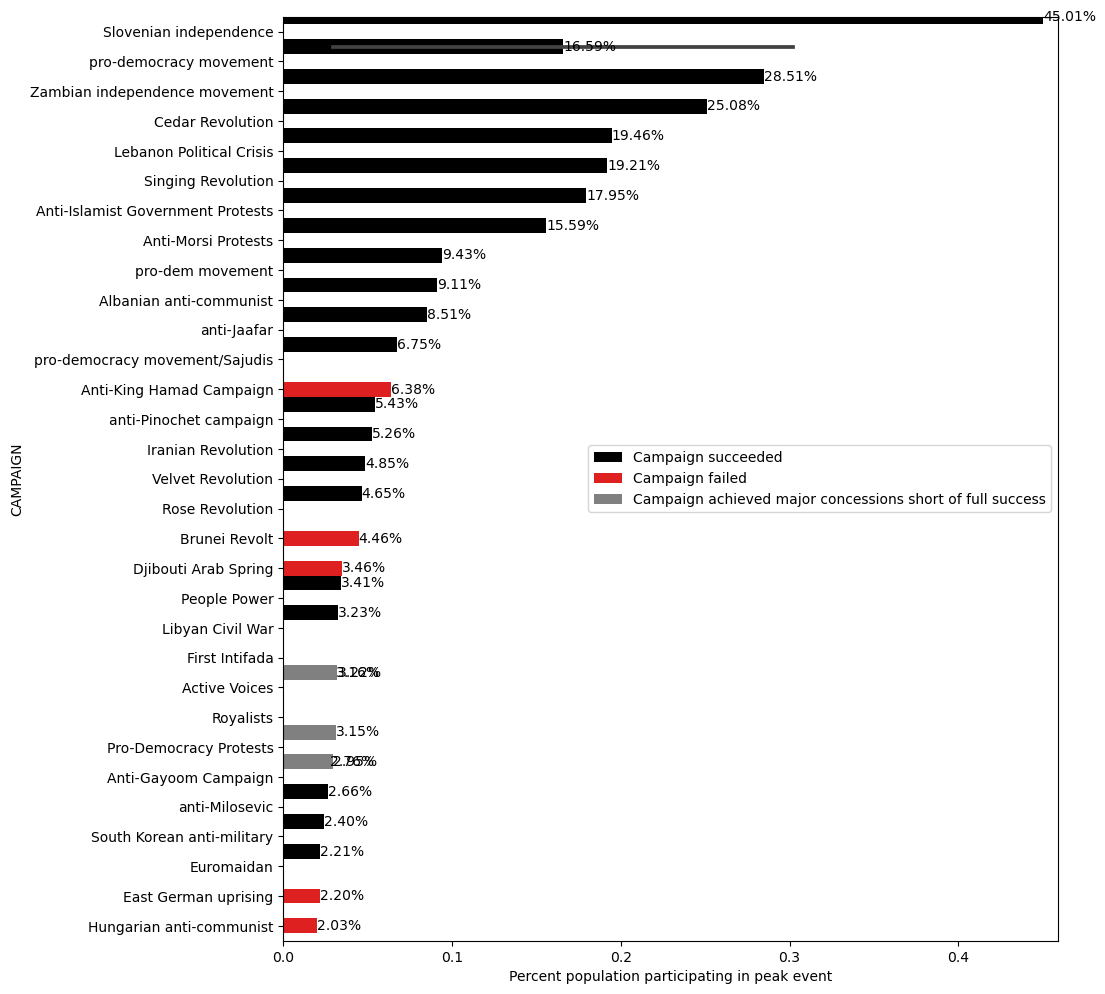

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering out only the ones with a percentage of popular participation greater than or equal to 2%
filtered_perc = df_navco[df_navco['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02].sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=False)
# Custom color dictionary
custom_colors = {'Campaign succeeded': 'black', 'Campaign achieved major concessions short of full success': 'gray', 'Campaign failed': 'red'}

# Set up the figure and axes with a custom size (adjust as needed)
fig, ax = plt.subplots(figsize=(10,12))

# Plotting with custom colors
hbars = sns.barplot(x="PERCENTAGEPOPULARPARTICIPATION", 
                    y="CAMPAIGN", 
                    hue="status", 
                    data=filtered_perc, palette=custom_colors,
                    width=1.5,
                    )

# Display values inside the bars
for p in hbars.patches:
    ax.annotate(f'{p.get_width():.2%}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center',)

# Set the x-axis label
ax.set_xlabel("Percent population participating in peak event")
ax.margins(x=0.02)
# Show the legend
ax.legend()

# Show the plot
plt.show()


## 3. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. Your plot should look like the following; explain it as best you can.

<img src="fig_4.svg" />

Then, do the same but with only the membership per capital as dependent variable. Your plot should look like this (explain why is this different than the previous one):

<img src="fig_5.svg" />

C:\Users\jason\AppData\Local\Temp\ipykernel_20848\3631018241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_regression['pop'] = first_regression['PARTICIPATION'] / first_regression['PERCENTAGEPOPULARPARTICIPATION']
C:\Users\jason\AppData\Local\Temp\ipykernel_20848\3631018241.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_regression['logged_part_per_capita'] = np.log(first_regression['PARTICIPATION']) / np.log(first_regression['pop'])
C:\Users\jason\AppData\Local\Temp\ipykernel_20848\3

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1297
Time:                        23:48:36   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8142      1.496     -1.881      0.060      -5.746      

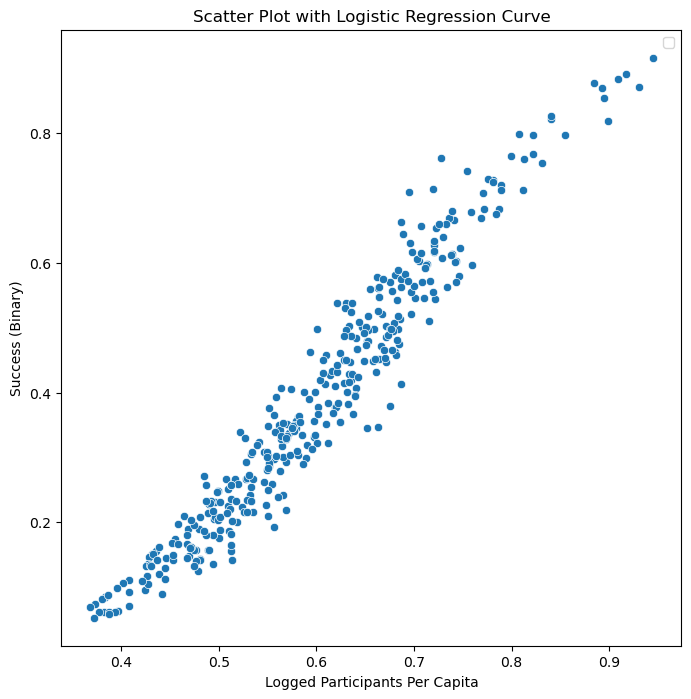

In [11]:
import statsmodels.api as sm
import pandas as pd
first_regression = df_navco

# Drop rows with missing values in the relevant columns
first_regression = first_regression.dropna(subset=['PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS'])

first_regression['pop'] = first_regression['PARTICIPATION'] / first_regression['PERCENTAGEPOPULARPARTICIPATION'] 

first_regression['logged_part_per_capita'] = np.log(first_regression['PARTICIPATION']) / np.log(first_regression['pop'])

first_regression['logged_pop'] = np.log(first_regression['pop'])

# Create a logistic regression model
X = first_regression[['logged_pop','logged_part_per_capita']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = first_regression['SUCCESS']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression
print(result.summary())
 
# Plotting the scatterplot with logistic regression curve
plt.figure(figsize=(8, 8))

# Scatterplot
sns.scatterplot(x='logged_part_per_capita', y=result.predict(X), data=first_regression)

# Add labels and title
plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Success (Binary)')
plt.title('Scatter Plot with Logistic Regression Curve')

# Show the legend
plt.legend()



## Logistic Regression Results Interpretation

### Model Summary:
- **Dependent Variable:** SUCCESS
- **No. Observations:** 380
- **Method:** Maximum Likelihood Estimation (MLE)
- **Pseudo R-squared:** 0.1297
- **Log-Likelihood:** -220.69
- **Converged:** True
- **Covariance Type:** Non-robust
- **LL-Null:** -253.58
- **LLR p-value:** 5.189e-15

### Coefficients:
- **const (Intercept):** -2.8142
- **logged_pop:** -0.1388
- **logged_part_per_capita:** 7.6475

### Interpretation of Coefficients:
- **Intercept:** The estimated log-odds of success when both independent variables are zero.
- **logged_pop:** For each unit increase in the logged population, the log-odds of success decrease by 0.1388.
- **logged_part_per_capita:** For each unit increase in the logged participation per capita, the log-odds of success increase by 7.6475.

### Statistical Significance:
- **P-values:**
  - const (Intercept): 0.060
  - logged_pop: 0.059
  - logged_part_per_capita: < 0.001

### Note:
- The Pseudo R-squared indicates that the model explains approximately 12.97% of the variability in the success variable.
- The model has converged successfully, and the likelihood ratio test suggests the overall statistical significance of the model.
- Interpretation of coefficients involves transforming them into odds ratios for a clearer understanding of the impact of predictors on the odds of success.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        23:48:37   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.3469      0.709     -7.536      0.000      -6.737      

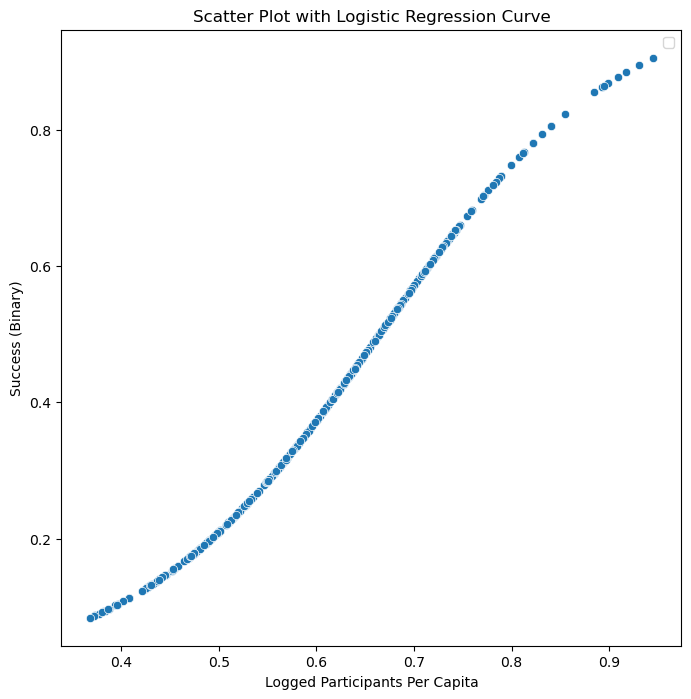

In [12]:
# Drop rows with missing values in the relevant columns
df_regression = first_regression[['SUCCESS', 'logged_part_per_capita']].dropna()

# Create a logistic regression model
X = df_regression[['logged_part_per_capita']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = df_regression['SUCCESS']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression
print(result.summary())

# Plotting the scatterplot with logistic regression curve
plt.figure(figsize=(8, 8))

# Scatterplot
sns.scatterplot(x='logged_part_per_capita', y=result.predict(X), data=df_regression)

# Add labels and title
plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Success (Binary)')
plt.title('Scatter Plot with Logistic Regression Curve')

# Show the legend
plt.legend()

plt.show()


## 4. The Level of Participation Tipping Point

As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.

Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.

<table>
<thead>
<tr><th>Peak Popular Participation (%)  </th><th style="text-align: right;">  Observations</th><th>Success Rate  </th></tr>
</thead>
<tbody>
<tr><td>greater than 3.5%               </td><td style="text-align: right;">            18</td><td>88.89%        </td></tr>
<tr><td>1.0% - 3.5%                     </td><td style="text-align: right;">            41</td><td>60.98%        </td></tr>
<tr><td>0.25% - 1.0%                    </td><td style="text-align: right;">            92</td><td>45.65%        </td></tr>
<tr><td>0.06% - 0.25%                   </td><td style="text-align: right;">            95</td><td>45.26%        </td></tr>
<tr><td>0.015% - 0.06%                  </td><td style="text-align: right;">            66</td><td>24.24%        </td></tr>
<tr><td>0.0035% - 0.015%                </td><td style="text-align: right;">            44</td><td>9.09%         </td></tr>
<tr><td>less than 0.0035%               </td><td style="text-align: right;">            24</td><td>4.17%         </td></tr>
</tbody>
</table>

In [13]:
import pandas as pd

# Assuming df_navco is your DataFrame
# Create bins and labels
bins = [0, 0.0035/100, 0.015/100, 0.06/100, 0.25/100, 1/100, 3.5/100, float('inf')]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

# Use pd.cut to create the bins and group by the bins
result = df_navco.groupby(pd.cut(df_navco['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=labels, right=True)).agg(
    Observations=('PERCENTAGEPOPULARPARTICIPATION', 'size'),
    SuccessRate=('SUCCESS', lambda x: f"{round(((x == 1).sum() / len(x))*100,2)}%")
).reset_index()

# Reverse the order of the DataFrame
reversed_df = result.iloc[::-1].reset_index(drop=True)

# Print the reversed DataFrame
display(reversed_df)

,PERCENTAGEPOPULARPARTICIPATION,Observations,SuccessRate
0,greater than 3.5%,18,88.89%
1,1.0% - 3.5%,41,60.98%
2,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
4,0.015% - 0.06%,66,24.24%
5,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

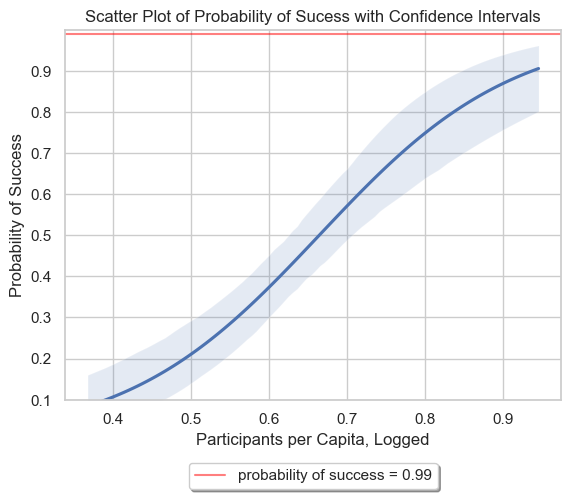

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_regression'
# 'SUCCESS' is the dependent variable, and 'logged_part_per_capita' is the independent variable

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot with regression line and confidence intervals
ax = sns.regplot(x='logged_part_per_capita', y='SUCCESS', data=df_regression, ci=99, scatter_kws={'s': 0}, logistic=True)

# Plot a horizontal line for SUCCESS = 0.99
ax.axhline(0.99, color='red', linestyle='-', label='probability of success = 0.99', alpha=0.5)

# Set the title and labels
plt.title('Scatter Plot of Probability of Sucess with Confidence Intervals')
plt.xlabel('Participants per Capita, Logged')
plt.ylabel('Probability of Success')

# Hide points where SUCCESS equals 0.99
ax.set(ylim=(0.1, 0.999))


# Move the legend to the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Show the plot
plt.show()

## 5. Nonviolent Resistance and Target Regime Type

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.


## Data Processing and Feature Calculation

### Merge Dataframes
We start by merging the two dataframes based on the location and the year since this is the best possible match of the two datasets.

### Select Relevant Fields
Finally, we select the fields for further analysis:

- 'NONVIOL': The nonviolence indicator
- 'polity2': The Polity V score of the campaign target
- 'loged_part': The logged participation
- 'logged_pop': The logged population

In [15]:
# Drop rows with missing values in the relevant columns
navco_polity_df = first_regression.merge(p5_df, left_on=['LOCATION', 'EYEAR'], right_on=['country', 'year'])

In [16]:
import statsmodels.api as sm
import pandas as pd

dependent_variable = 'SUCCESS'

# Calculating the log of the participation
navco_polity_df['loged_part'] = np.log(first_regression['PARTICIPATION'])

# Selecting relevant columns
independent_variables = ['NONVIOL', 'polity2', 'loged_part', 'logged_pop']

# Extracting the selected columns
data = navco_polity_df[[dependent_variable] + independent_variables]

# Dropping rows with missing values
data = data.dropna()

# Adding a constant term for the intercept
data = sm.add_constant(data)

# Defining the logistic regression model
logit_model = sm.Logit(data[dependent_variable], data[independent_variables])

# Fitting the model
result = logit_model.fit()

# Displaying the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.576744
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  288
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1427
Time:                        23:48:40   Log-Likelihood:                -166.10
converged:                       True   LL-Null:                       -193.75
Covariance Type:            nonrobust   LLR p-value:                 5.962e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NONVIOL        1.6891      0.267      6.338      0.000       1.167       2.211
polity2        0.0494      0.

# Logistic Regression Results Summary

## Summary Information
- **Optimization terminated successfully:** The optimization algorithm converged successfully.
- **Current function value:** -166.10
- **Iterations:** 5

## Model Information
- **Dependent Variable (Dep. Variable):** `SUCCESS`
- **Model:** Logistic Regression
- **No. Observations:** 288
- **Method:** MLE (Maximum Likelihood Estimation)
- **Pseudo R-squared:** 0.1427
- **Log-Likelihood:** -166.10
- **Converged:** True
- **Covariance Type:** Nonrobust
- **LLR p-value:** 5.962e-12

## Interpretation
1. **NONVIOL (Nonviolent Resistance):**
   - Coefficient: 1.6891
   - P-value: < 0.001
   - Interpretation: A one-unit increase in `NONVIOL` is associated with a 1.6891 increase in the log-odds of success. Statistically significant.

2. **polity2 (Polity V Score of Campaign Target):**
   - Coefficient: 0.0494
   - P-value: 0.042
   - Interpretation: A one-unit increase in `polity2` is associated with a 0.0494 increase in the log-odds of success. Statistically significant at 0.05.

3. **loged_part (Log of Participation):**
   - Coefficient: 0.0316
   - P-value: 0.614
   - Interpretation: Not statistically significant at 0.05.

4. **logged_pop (Location’s Logged Population):**
   - Coefficient: -0.0963
   - P-value: 0.012
   - Interpretation: A one-unit increase in `logged_pop` is associated with a -0.0963 decrease in the log-odds of success. Statistically significant at 0.05.

## Conclusion
- Nonviolent resistance, the political regime of the campaign target, and the population of the location are important predictors of success.
- The log of participation does not significantly contribute to the model in this context.


## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, on ChatGPT, Bard, or Bing, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.